# Customer Churn

## Gaurav Shinde
### AI/ML course 

In [800]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV,cross_validate, GridSearchCV, cross_val_score
from imblearn.over_sampling import SMOTE
# from imblearn.over_sampling import ADASYN
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as LDA
from sklearn.model_selection import RepeatedStratifiedKFold



import pickle
import math
np.random.seed(30)


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 10)


In [764]:
customer_data = {}
customer_data['CustomerId'] = np.random.randint(10000,20000, size=10000)
customer_data['CreditScore'] = np.random.randint(500,800, size=10000)
customer_data['Age'] = np.random.randint(20,60, size=10000)
customer_data['Tenure'] = np.random.randint(1,10, size=10000)
customer_data['Balance'] = np.random.randint(1000,10000, size=10000)
customer_data['NumOfProducts'] = np.random.randint(1,5, size=10000)
customer_data['HasCrCard'] = np.random.choice(['Yes','No'], size=10000)
customer_data['IsActiveMember'] = np.random.choice(['Yes','No'], size=10000)
customer_data['EstimatedSalary'] = np.random.randint(30000,100000, size=10000)
customer_data['Churn'] = np.random.choice(['Yes','No'], size=10000,p=[0.1,0.9])

df = pd.DataFrame(data=customer_data)
df

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,15925,560,33,2,9149,2,No,Yes,48005,Yes
1,14517,655,49,6,1242,2,Yes,No,93597,No
2,10500,690,23,6,5103,2,Yes,No,66427,Yes
3,10919,791,42,5,7832,3,No,No,82245,No
4,14859,517,24,2,7930,4,Yes,Yes,33037,No
...,...,...,...,...,...,...,...,...,...,...
9995,12886,561,53,1,2612,4,Yes,No,55760,No
9996,10741,581,27,6,1769,3,Yes,No,39205,No
9997,12072,758,48,2,4030,3,Yes,Yes,50166,Yes
9998,10313,751,54,3,1449,4,Yes,Yes,47054,No


In [765]:
#describe and statistics for dataset

display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerId       10000 non-null  int32 
 1   CreditScore      10000 non-null  int32 
 2   Age              10000 non-null  int32 
 3   Tenure           10000 non-null  int32 
 4   Balance          10000 non-null  int32 
 5   NumOfProducts    10000 non-null  int32 
 6   HasCrCard        10000 non-null  object
 7   IsActiveMember   10000 non-null  object
 8   EstimatedSalary  10000 non-null  int32 
 9   Churn            10000 non-null  object
dtypes: int32(7), object(3)
memory usage: 507.9+ KB


None

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,14951.769100,650.102400,39.44550,4.994600,5546.073100,2.523400,64934.015600
std,2887.319824,86.286671,11.53517,2.567806,2591.370902,1.119633,20176.161716
min,10000.000000,500.000000,20.00000,1.000000,1000.000000,1.000000,30005.000000
25%,12437.500000,576.000000,29.00000,3.000000,3324.000000,2.000000,47446.250000
50%,14894.500000,650.000000,39.00000,5.000000,5562.000000,3.000000,64877.500000
75%,17453.000000,724.000000,49.00000,7.000000,7791.000000,4.000000,82651.500000
max,19999.000000,799.000000,59.00000,9.000000,9998.000000,4.000000,99984.000000


In [766]:
#categorical features

categorical_values=df.select_dtypes(include='object').columns
categorical_values

Index(['HasCrCard', 'IsActiveMember', 'Churn'], dtype='object')

In [767]:
#Duplicates check

duplicateRows = df[df.duplicated()] 
len(duplicateRows)

0

In [768]:
#categorical uniques
print(df.select_dtypes(include='object').nunique())

HasCrCard         2
IsActiveMember    2
Churn             2
dtype: int64


In [769]:
#CustomerLifetimeValue

df['CustomerLifetimeValue'] = df['Balance']*df['Tenure']
df['CustomerLifetimeValue'].describe()

count    10000.000000
mean     27745.662000
std      20366.234643
min       1000.000000
25%      10569.000000
50%      22688.000000
75%      40453.500000
max      89676.000000
Name: CustomerLifetimeValue, dtype: float64

In [770]:
#Label encode

le=LabelEncoder()
for col in categorical_values:
    df[col]=le.fit_transform(df[col])

In [771]:
#CustomerEngagementScore

ces_df = df.groupby('CustomerId')[['NumOfProducts','IsActiveMember']].mean()
display(ces_df)

# ces_s = ces_df[['NumOfProducts','IsActiveMember']].mean(axis=1).round(0).astype(int)
ces_s = (ces_df['NumOfProducts']*ces_df['IsActiveMember']).round(0).astype(int)
ces_s.name='CustomerEngagementScore'
display(ces_s)

result = pd.merge(df, ces_s, on="CustomerId", how="left", validate="many_to_one")
df = result.sort_values(by='CustomerId').reset_index(drop=True)
display(df)


,NumOfProducts,IsActiveMember
CustomerId,,
10000,2.5,1.0
10001,4.0,0.0
10002,1.0,1.0
10003,1.0,1.0
10004,1.0,0.0
...,...,...
19994,2.0,1.0
19995,4.0,0.0
19997,3.0,0.0


CustomerId
10000    2
10001    0
10002    1
10003    1
10004    0
        ..
19994    2
19995    0
19997    0
19998    4
19999    0
Name: CustomerEngagementScore, Length: 6330, dtype: int32

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,CustomerLifetimeValue,CustomerEngagementScore
0,10000,525,37,9,8419,4,0,1,71718,1,75771,2
1,10000,663,46,7,2438,1,1,1,72469,0,17066,2
2,10001,512,24,4,5690,4,0,0,39293,0,22760,0
3,10002,707,40,8,7220,1,1,1,41448,0,57760,1
4,10003,549,42,9,3355,1,1,1,81343,0,30195,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19994,698,40,3,5618,2,1,1,43402,1,16854,2
9996,19995,517,30,7,3482,4,0,0,49173,0,24374,0
9997,19997,613,48,2,2868,3,0,0,63617,0,5736,0
9998,19998,662,57,5,6004,4,0,1,77932,1,30020,4


In [772]:
# Multiple samples for single customer?

print('Could a customer in dataset have multiple samples? : {}'.format(df['CustomerId'].value_counts().max() > 1))

Could a customer in dataset have multiple samples? : True


In [773]:
#Aggregate samples on CustomerId

df1=df.groupby('CustomerId')[df.columns.drop(['Churn','IsActiveMember','HasCrCard']).values].mean()
df2=df.groupby('CustomerId')['Churn','IsActiveMember','HasCrCard'].mean() # .agg(lambda x: x.value_counts().index[0])
df=pd.concat((df1,df2),axis=1).drop('CustomerId',axis=1).reset_index(level=['CustomerId'])
df.sort_values('CustomerId').head(10)
print(df.shape)
display(df)

(6330, 12)


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,CustomerLifetimeValue,CustomerEngagementScore,Churn,IsActiveMember,HasCrCard
0,10000,594.0,41.5,8.0,5428.5,2.5,72093.5,46418.5,2.0,0.5,1.0,0.5
1,10001,512.0,24.0,4.0,5690.0,4.0,39293.0,22760.0,0.0,0.0,0.0,0.0
2,10002,707.0,40.0,8.0,7220.0,1.0,41448.0,57760.0,1.0,0.0,1.0,1.0
3,10003,549.0,42.0,9.0,3355.0,1.0,81343.0,30195.0,1.0,0.0,1.0,1.0
4,10004,518.0,54.0,9.0,2152.0,1.0,57143.0,19368.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6325,19994,698.0,40.0,3.0,5618.0,2.0,43402.0,16854.0,2.0,1.0,1.0,1.0
6326,19995,517.0,30.0,7.0,3482.0,4.0,49173.0,24374.0,0.0,0.0,0.0,0.0
6327,19997,613.0,48.0,2.0,2868.0,3.0,63617.0,5736.0,0.0,0.0,0.0,0.0
6328,19998,662.0,57.0,5.0,6004.0,4.0,77932.0,30020.0,4.0,1.0,1.0,0.0


In [774]:
#Round float to int

df=df.round(0).astype(int)
df

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,CustomerLifetimeValue,CustomerEngagementScore,Churn,IsActiveMember,HasCrCard
0,10000,594,42,8,5428,2,72094,46418,2,0,1,0
1,10001,512,24,4,5690,4,39293,22760,0,0,0,0
2,10002,707,40,8,7220,1,41448,57760,1,0,1,1
3,10003,549,42,9,3355,1,81343,30195,1,0,1,1
4,10004,518,54,9,2152,1,57143,19368,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6325,19994,698,40,3,5618,2,43402,16854,2,1,1,1
6326,19995,517,30,7,3482,4,49173,24374,0,0,0,0
6327,19997,613,48,2,2868,3,63617,5736,0,0,0,0
6328,19998,662,57,5,6004,4,77932,30020,4,1,1,0


In [775]:
#duplicate rows

duplicateRows = df[df.duplicated()] #checks duplicate rows based on all feature values
len(duplicateRows)

0

Plotting for column CustomerId


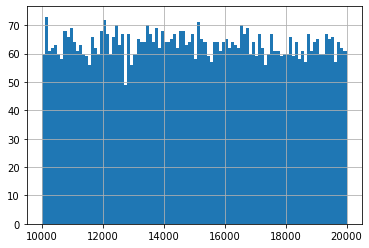

Plotting for column CreditScore


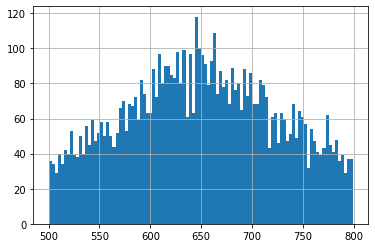

Plotting for column Age


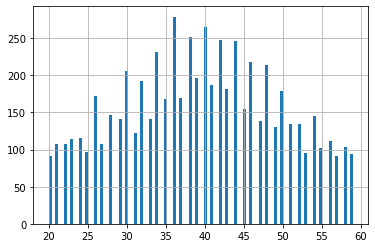

Plotting for column Tenure


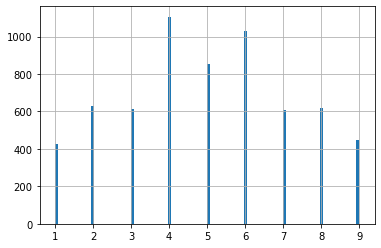

Plotting for column Balance


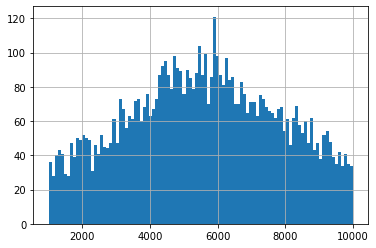

Plotting for column NumOfProducts


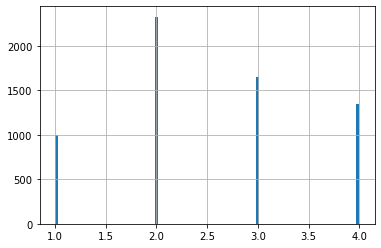

Plotting for column EstimatedSalary


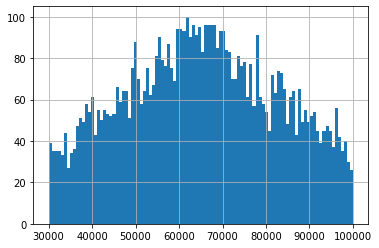

Plotting for column CustomerLifetimeValue


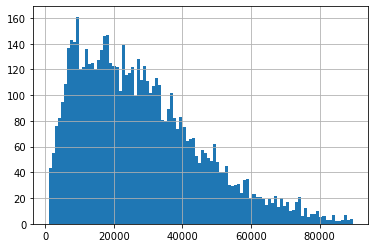

Plotting for column CustomerEngagementScore


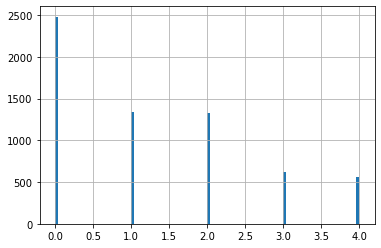

Plotting for column Churn


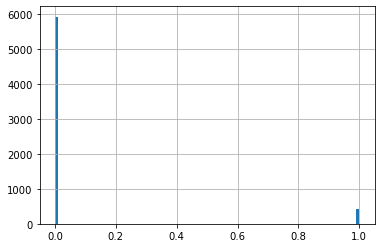

Plotting for column IsActiveMember


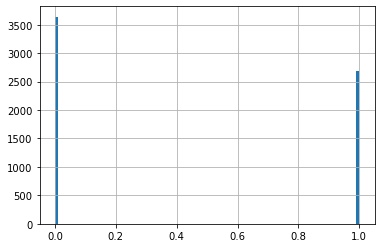

Plotting for column HasCrCard


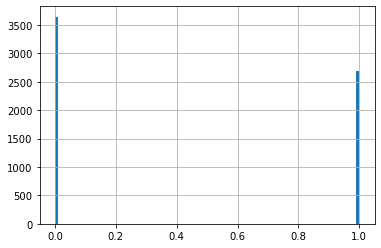

In [776]:
#Frequency Distribution of features

temp_df=df.round(0).astype(int)
for col in df.columns:
    hist = temp_df[col].hist(bins=100)
    print("Plotting for column {}".format(col))
    plt.show()

#Optimal bins number?

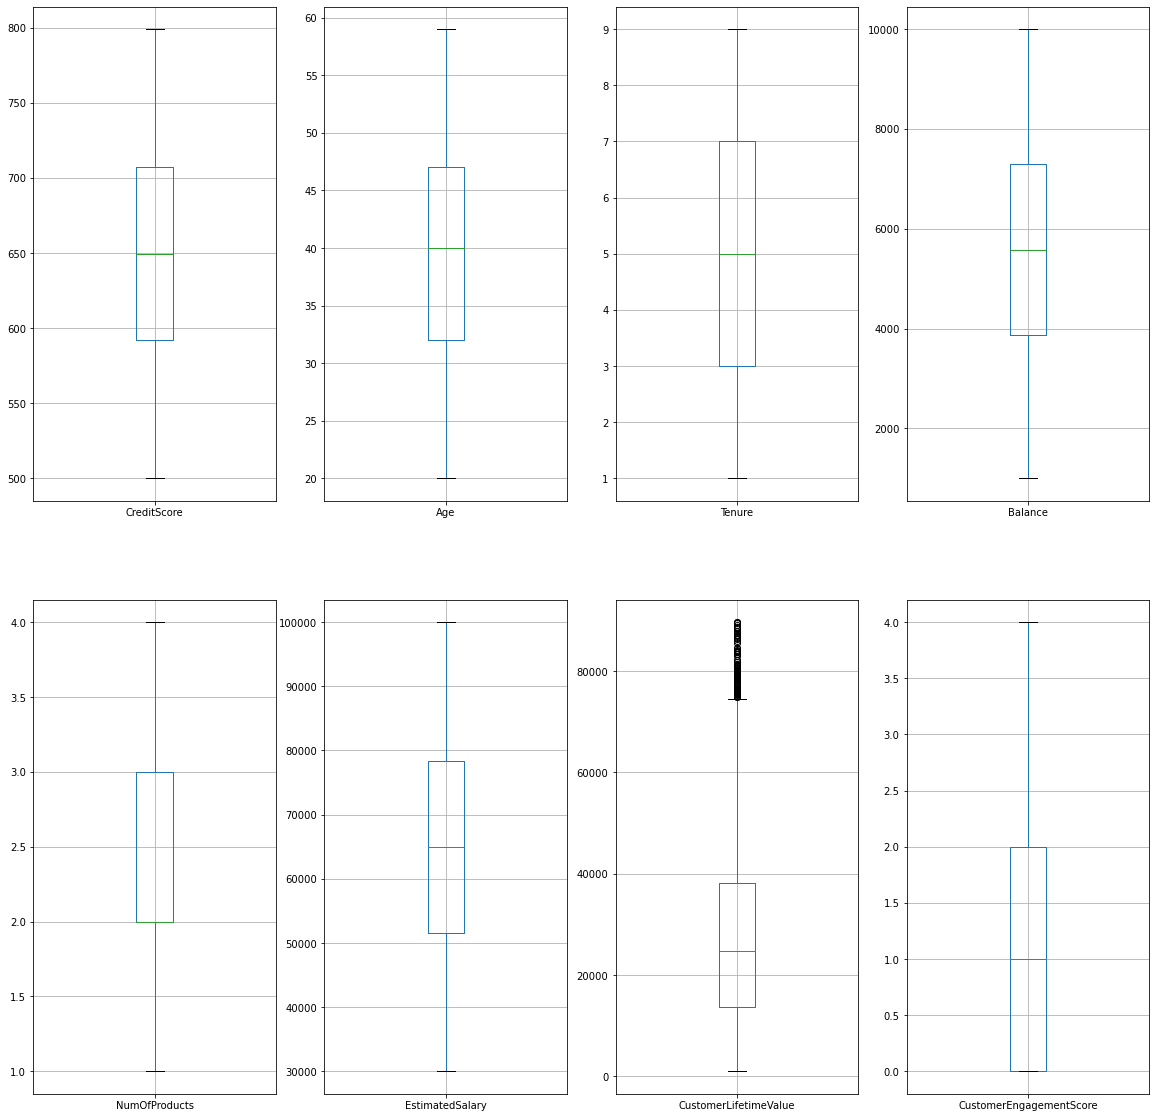

In [777]:
#Outliers box plot

fig, axes = plt.subplots(2,4,figsize=(20,20)) # create figure and axes

for i,col in enumerate(list(df.drop(columns=np.append(categorical_values, values='CustomerId'), axis=1))[:]):
    a = df.boxplot(col, ax=axes.flatten()[i])
    
plt.show()

In [778]:
#Outliers

'''
Cons:
- lead to bad model generalization of data
- skews data
- introduces variance that may lead to overfitting

Removal Pros:

Removal Cons:
''';

def find_outliers_IQR(df,col):
    temp_df=df.copy()

    s=temp_df[col]

    median=s.median()

    q1=s.quantile(0.25)

    q3=s.quantile(0.75)

    IQR=q3-q1

    upper = s[~(s>(q3+1.5*IQR))].max()

    lower = s[~(s<(q1-1.5*IQR))].min()
    
    return temp_df[((temp_df[col]<lower) | (temp_df[col]>upper))]

def impute_outliers_IQR(df,col):
    temp_df=df.copy()
    
    s=temp_df[col]

    median=s.median()

    q1=s.quantile(0.25)

    q3=s.quantile(0.75)

    IQR=q3-q1

    upper = s[~(s>(q3+1.5*IQR))].max()

    lower = s[~(s<(q1-1.5*IQR))].min()
    
    temp_df[col] = np.where(temp_df[col]>upper,median, np.where(temp_df[col]<lower,median,temp_df[col]))

    if find_outliers_IQR(temp_df,col).size>0:
        return impute_outliers_IQR(temp_df,col)
    else:
        return temp_df
    
print(f'before outliers: {find_outliers_IQR(df,"CustomerLifetimeValue").shape[0]}')

df=impute_outliers_IQR(df,'CustomerLifetimeValue').copy()
print(df.shape)

print(f'after outliers: {find_outliers_IQR(df,"CustomerLifetimeValue").shape[0]}')
print(df.shape)

display(df['CustomerLifetimeValue'].value_counts().head())


before outliers: 94
(6330, 12)
after outliers: 0
(6330, 12)


24734.500    94
24733.750    42
24733.375    13
32346.000     4
11586.000     3
Name: CustomerLifetimeValue, dtype: int64

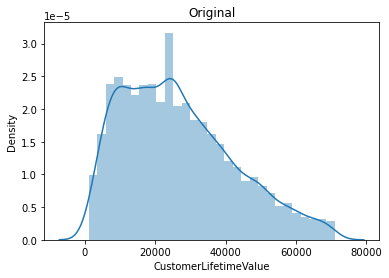

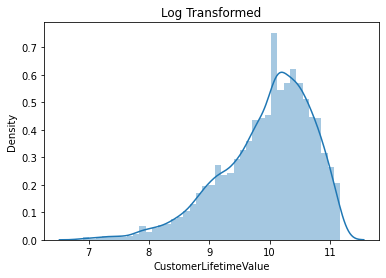

In [779]:
# apply log transformation for normalized distribution
sns.distplot(df['CustomerLifetimeValue'])
plt.title('Original')
plt.show()

sns.distplot(df['CustomerLifetimeValue'].apply(np.log))
plt.title('Log Transformed')
plt.show()

<AxesSubplot:>

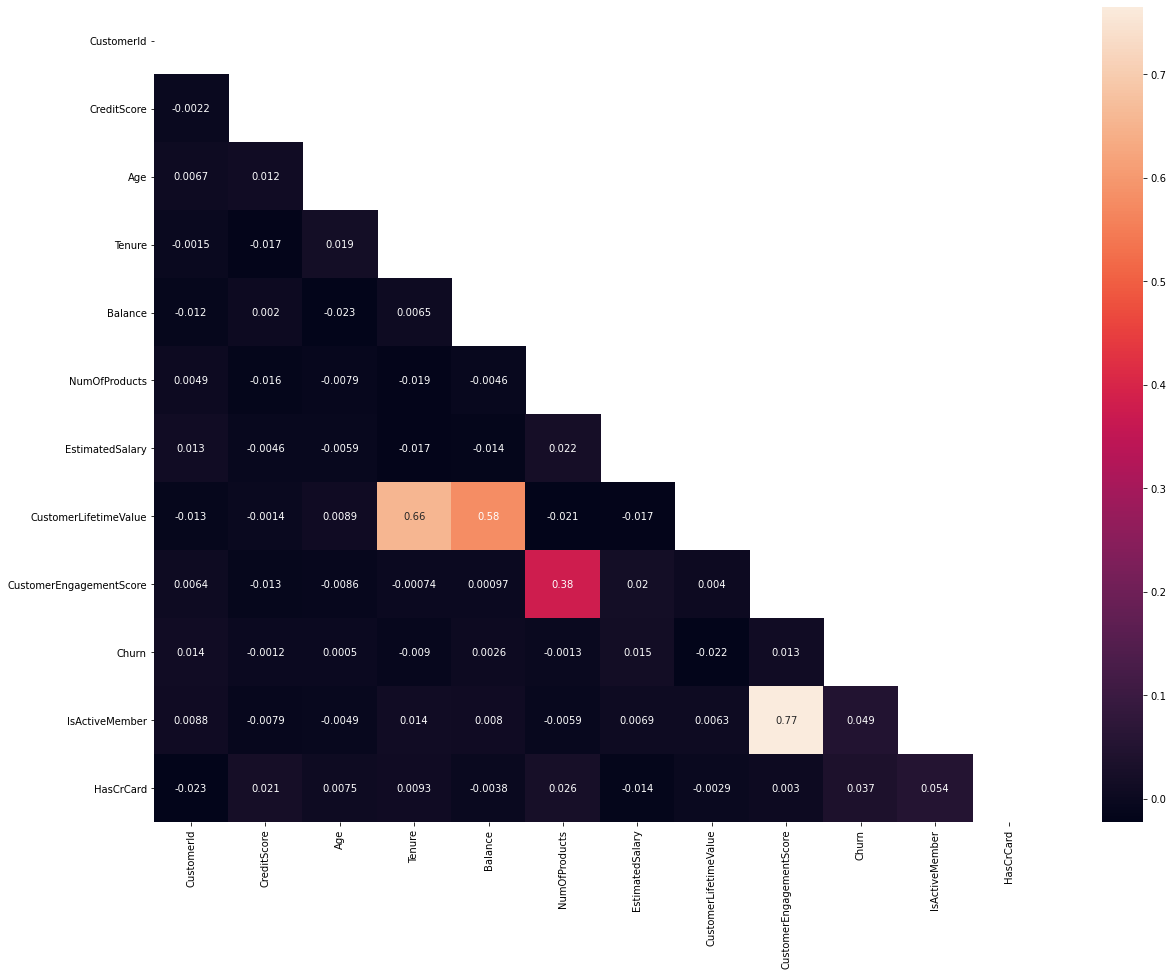

In [780]:
# drop columns with multicollinearity

plt.figure(figsize=(20,15))
ax=plt.subplot(111)
corr=df.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
sns.heatmap(corr,annot=True,ax=ax,mask=mask)



In [781]:
df.drop(columns=['Tenure','Balance','IsActiveMember'],inplace=True,axis=1)

In [782]:
#drop customer id

df.drop('CustomerId',inplace=True,axis=1)
df.head(9)

,CreditScore,Age,NumOfProducts,EstimatedSalary,CustomerLifetimeValue,CustomerEngagementScore,Churn,HasCrCard
0,594,42,2,72094,46418.0,2,0,0
1,512,24,4,39293,22760.0,0,0,0
2,707,40,1,41448,57760.0,1,0,1
3,549,42,1,81343,30195.0,1,0,1
4,518,54,1,57143,19368.0,0,0,1
5,786,42,3,58396,48235.0,3,0,1
6,726,40,4,71439,22242.0,2,0,0
7,720,42,2,66464,13065.0,0,0,0
8,660,37,4,53661,62112.0,0,0,0


In [783]:
#reshuffle data

df=df.sample(frac = 1).reset_index(drop=True)
df

,CreditScore,Age,NumOfProducts,EstimatedSalary,CustomerLifetimeValue,CustomerEngagementScore,Churn,HasCrCard
0,774,34,1,82499,40672.0,0,0,1
1,678,46,4,65723,24063.0,0,0,0
2,738,38,2,55439,40356.0,1,0,0
3,774,22,3,54208,18030.0,0,0,1
4,586,28,3,68780,42316.0,3,0,0
...,...,...,...,...,...,...,...,...
6325,634,44,2,55084,32351.0,1,0,1
6326,672,22,4,35553,7254.0,4,0,1
6327,530,30,3,76412,43164.0,0,0,1
6328,657,42,3,59970,57470.0,2,0,1


In [784]:
# Standardized scaling

ss=StandardScaler()
x_scaled=ss.fit_transform(df.drop('Churn',axis=1))


Text(0.5, 1.0, 'y_test')

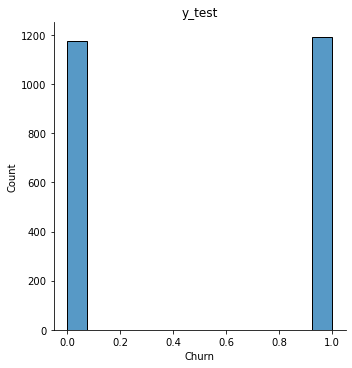

In [785]:
#data imbalance oversampling
sm = SMOTE(random_state = 2) 
x_res_scaled, y_res = sm.fit_resample(x_scaled,df['Churn'].astype('int32'))

sns.displot(data=y_test, kind="hist")
plt.title('y_test')

In [786]:
#data splitting
x_train, x_test, y_train, y_test = train_test_split(x_res_scaled,y_res,test_size=.2,random_state=30)
print(f'x train {x_train.shape}, y train {y_train.shape}\nx test {x_test.shape}, y test {y_test.shape}')
display(pd.DataFrame(x_train,columns=df.columns.drop('Churn')).describe())

x train (9470, 7), y train (9470,)
x test (2368, 7), y test (2368,)


,CreditScore,Age,NumOfProducts,EstimatedSalary,CustomerLifetimeValue,CustomerEngagementScore,HasCrCard
count,9470.000000,9470.000000,9470.000000,9470.000000,9470.000000,9470.000000,9470.000000
mean,0.010744,-0.008806,-0.003178,0.034982,-0.056326,0.026656,0.067098
std,1.000358,1.036239,1.015284,1.036063,0.973396,1.042107,1.007355
min,-1.983951,-1.924796,-1.538210,-1.993482,-1.601399,-0.977631,-0.858824
25%,-0.764070,-0.864493,-0.533166,-0.798784,-0.851070,-0.977631,-0.858824
50%,-0.008274,-0.042446,-0.224512,0.012022,-0.159666,-0.214573,-0.858824
75%,0.787300,0.849194,0.483060,0.937153,0.542427,0.548486,1.164383
max,1.980662,1.938976,1.476923,1.986472,2.796354,2.074603,1.164383


In [787]:
# Dimensionality Reduction

# It was ineffective in increasing accuracy of model.

# pca = PCA(n_components=x_train.shape[1]-1)
# x_train=pca.fit_transform(x_train)
# print(f'variance ratios: {pca.explained_variance_ratio_}')
# # print(pca.feature_names_in_)
# print(x_train.shape)
# # print(get_properies(pca))
# x_test=pca.transform(x_test)


In [788]:
# parameters

metrics={
    'train_accuracy':{},
    'test_accuracy':{},
    'recall_NoChurn':{},
    'recall_Churn':{},
    'precision_NoChurn':{},
    'precision_Churn':{},
    'f1_NoChurn':{},
    'f1_Churn':{},
    'roc-auc-score':{}
}
best_params_gscv={}
best_params_rscv={}

print(metrics)

gscv_pg={
    "lr":{
    'penalty':['l1','l2','elasticnet'],
    'C':np.logspace(-4,4,20),
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter': [250,500,750]
    },
    'rf':{ 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
    },
    'bnb':None,
    'knn':{
        'weights': ['uniform', 'distance']
    },
    #Takes a very long time, computationally intensive, hence disqualified for GSCV
    'svm':None,
#     {
#         'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid','linear']
#     },
    'dtc':{
    'max_features': ['auto', 'sqrt', 'log2'],
    'ccp_alpha': [0.1, .01, .001],
    'max_depth' : [5, 6, 7, 8, 9],
    'criterion' :['gini', 'entropy']
    },
    'gnb':{'var_smoothing': np.logspace(0,-9, num=100)}
}

rscv_pg={
    "lr":{
    'penalty':['l1','l2','elasticnet'],
    'C':np.logspace(-4,4,20),
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter': [250,500,750]
    },
    'rf':{ 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
    },
    'bnb':None,
    'knn':{
        'weights': ['uniform', 'distance']
    },
    #Takes a very long time, computationally intensive, hence disqualified for GSCV
    'svm':None,
#     {
#         'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid','linear']
#     },
    'dtc':{
    'max_features': ['auto', 'sqrt', 'log2'],
    'ccp_alpha': [0.1, .01, .001],
    'max_depth' : [5, 6, 7, 8, 9],
    'criterion' :['gini', 'entropy']
    },
    'gnb':{'var_smoothing': np.logspace(0,-9, num=100)}
}
models={
    'lr':LogisticRegression(random_state=0),
    'bnb':BernoulliNB(),
    'knn':None,
    'svm':SVC(random_state=0), 
    'rf':RandomForestClassifier(random_state=0),
    'dtc':DecisionTreeClassifier(random_state=0),
    'gnb':GaussianNB(),
    
}
roc_auc_curve_params={}

{'train_accuracy': {}, 'test_accuracy': {}, 'recall_NoChurn': {}, 'recall_Churn': {}, 'precision_NoChurn': {}, 'precision_Churn': {}, 'f1_NoChurn': {}, 'f1_Churn': {}, 'roc-auc-score': {}}


In [791]:

#global vars
allow_gscv=False
allow_rscv=False
knn_k=-1

#graphing solution needed for roc-auc curve within one plot with legend
#model pipeline
def model_pipeline(models,gcsv_pg,data,metrics,best_params, roc_auc_curve_params):
    k=-1
    for mod_name,model in models.items():
        orig_mod_name=mod_name
        orig_model=model
        
        try:
            if mod_name is 'knn':
                error_rate = []
                k_range=data[0].shape[1]
                
                for i in range(1,k_range):
                    knn = KNeighborsClassifier(n_neighbors=i)
                    score = cross_val_score(knn, data[0], data[1], cv=10)
                    error_rate.append(1-score.mean())
               
                plt.figure(figsize=(k_range,5))
                plt.plot(range(1,k_range), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
                plt.title('Error rate VS K Value')
                plt.xlabel('K')
                plt.ylabel('Error Rate')
                plt.show()
                
                k=error_rate.index(min(error_rate))+1
                global knn_k
                knn_k=k
                model=KNeighborsClassifier(n_neighbors=k)

            model.fit(data[0],data[1])
            y_pred=model.predict(data[2])

            cr=classification_report(data[3],y_pred,output_dict=True)
            
            roc_auc_curve_params[mod_name]=roc_curve(y_test, y_pred)
            
        except Exception as e:
            print(f'Error is {e}\n\nContinuing to the next model...\n\n')
            continue
                
        metrics['train_accuracy'].update({mod_name:model.score(data[0], data[1])})
        metrics['test_accuracy'].update({mod_name:model.score(data[2], data[3])})
        metrics['recall_NoChurn'].update({mod_name:cr['0']['recall']})
        metrics['recall_Churn'].update({mod_name:cr['1']['recall']})
        metrics['precision_NoChurn'].update({mod_name:cr['0']['precision']})
        metrics['precision_Churn'].update({mod_name:cr['1']['precision']})
        metrics['f1_NoChurn'].update({mod_name:cr['0']['f1-score']})
        metrics['f1_Churn'].update({mod_name:cr['1']['f1-score']})
        metrics['roc-auc-score'].update({mod_name:roc_auc_score(data[3], y_pred)})
        
        #GRIDSEARCHCV
        global allow_gscv
        if gscv_pg[mod_name] is not None and allow_gscv:
            
            clf=GridSearchCV(model,param_grid=gscv_pg[mod_name], cv=10,n_jobs=-1)
            
            print(f'Training GridSearchCV for {mod_name}...')
            clf.fit(data[0],data[1])
            print(f'GridSearchCV for {mod_name} completed ...')
            print('\n')
            
            y_pred = clf.best_estimator_.predict(data[2])

            best_params_gscv[mod_name] = clf.best_params_
            mod_name=mod_name+'_gscv'
            model=clf.best_estimator_

            cr=classification_report(data[3],y_pred,output_dict=True)

            metrics['train_accuracy'].update({mod_name:model.score(data[0], data[1])})
            metrics['test_accuracy'].update({mod_name:model.score(data[2], data[3])})
            metrics['recall_NoChurn'].update({mod_name:cr['0']['recall']})
            metrics['recall_Churn'].update({mod_name:cr['1']['recall']})
            metrics['precision_NoChurn'].update({mod_name:cr['0']['precision']})
            metrics['precision_Churn'].update({mod_name:cr['1']['precision']})
            metrics['f1_NoChurn'].update({mod_name:cr['0']['f1-score']})
            metrics['f1_Churn'].update({mod_name:cr['1']['f1-score']})
            metrics['roc-auc-score'].update({mod_name:roc_auc_score(data[3], y_pred)})
            
        
        #RANDOMIZEDSEARCHCV
        mod_name=orig_mod_name
        model=orig_model 
    
        global allow_rscv
        if rscv_pg[mod_name] is not None and allow_rscv:

            clf=RandomizedSearchCV(model,param_distributions=rscv_pg[mod_name], cv=10,n_jobs=-1)
            
            print(f'Training RandomizedSearchCV for {mod_name}...')
            clf.fit(data[0],data[1])
            print(f'RandomizedSearchCV for {mod_name} completed ...')
            print('\n')
            
            y_pred = clf.best_estimator_.predict(data[2])

            best_params_rscv[mod_name] = clf.best_params_
            mod_name=mod_name+'_rscv'
            model=clf.best_estimator_

            cr=classification_report(data[3],y_pred,output_dict=True)

            metrics['train_accuracy'].update({mod_name:model.score(data[0], data[1])})
            metrics['test_accuracy'].update({mod_name:model.score(data[2], data[3])})
            metrics['recall_NoChurn'].update({mod_name:cr['0']['recall']})
            metrics['recall_Churn'].update({mod_name:cr['1']['recall']})
            metrics['precision_NoChurn'].update({mod_name:cr['0']['precision']})
            metrics['precision_Churn'].update({mod_name:cr['1']['precision']})
            metrics['f1_NoChurn'].update({mod_name:cr['0']['f1-score']})
            metrics['f1_Churn'].update({mod_name:cr['1']['f1-score']})
            metrics['roc-auc-score'].update({mod_name:roc_auc_score(data[3], y_pred)})

    #PRINT and VISUALIZE
    for met_name in metrics:
        print(met_name)
        for mod_name,val in metrics[met_name].items():
            if mod_name in ['knn','knn_gscv','knn_rscv']:
                print(f'k={k}, {mod_name} : {val:.4f}')
            else:
                print(f'{mod_name} : {val:.4f}')
        print('\n')
    
    print('GridSearchCV Best Parameters')
    for key, value in best_params_gscv.items():
        print(key, " : ", value)
    
    print('RandomizedSearchCV Best Parameters')
    for key, value in best_params_rscv.items():
        print(key, " : ", value)
     
    plt.figure(figsize=(20,10))
    for mod_name,val in roc_auc_curve_params.items():
        fpr, tpr, thresholds = val
        plt.plot(fpr, tpr, label=mod_name)
        print('\n')
    plt.title('ROC-AUC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.show()



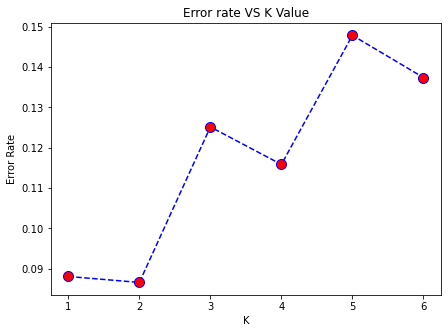

train_accuracy
lr : 0.5504
lr_gscv : 0.5556
bnb : 0.5365
k=2, knn : 0.9922
k=2, knn_gscv : 0.9922
svm : 0.7475
rf : 1.0000
dtc : 1.0000
gnb : 0.5607


test_accuracy
lr : 0.5431
lr_gscv : 0.5477
bnb : 0.5389
k=2, knn : 0.9231
k=2, knn_gscv : 0.9231
svm : 0.7335
rf : 0.9535
dtc : 0.8889
gnb : 0.5718


recall_NoChurn
lr : 0.5587
lr_gscv : 0.5808
bnb : 0.5561
k=2, knn : 0.8937
k=2, knn_gscv : 0.8937
svm : 0.6548
rf : 0.9558
dtc : 0.8835
gnb : 0.5901


recall_Churn
lr : 0.5277
lr_gscv : 0.5151
bnb : 0.5218
k=2, knn : 0.9522
k=2, knn_gscv : 0.9522
svm : 0.8112
rf : 0.9513
dtc : 0.8943
gnb : 0.5537


precision_NoChurn
lr : 0.5385
lr_gscv : 0.5416
bnb : 0.5343
k=2, knn : 0.9486
k=2, knn_gscv : 0.9486
svm : 0.7739
rf : 0.9509
dtc : 0.8918
gnb : 0.5661


precision_Churn
lr : 0.5479
lr_gscv : 0.5547
bnb : 0.5437
k=2, knn : 0.9008
k=2, knn_gscv : 0.9008
svm : 0.7043
rf : 0.9562
dtc : 0.8861
gnb : 0.5779


f1_NoChurn
lr : 0.5484
lr_gscv : 0.5605
bnb : 0.5450
k=2, knn : 0.9203
k=2, knn_gscv : 0.9203

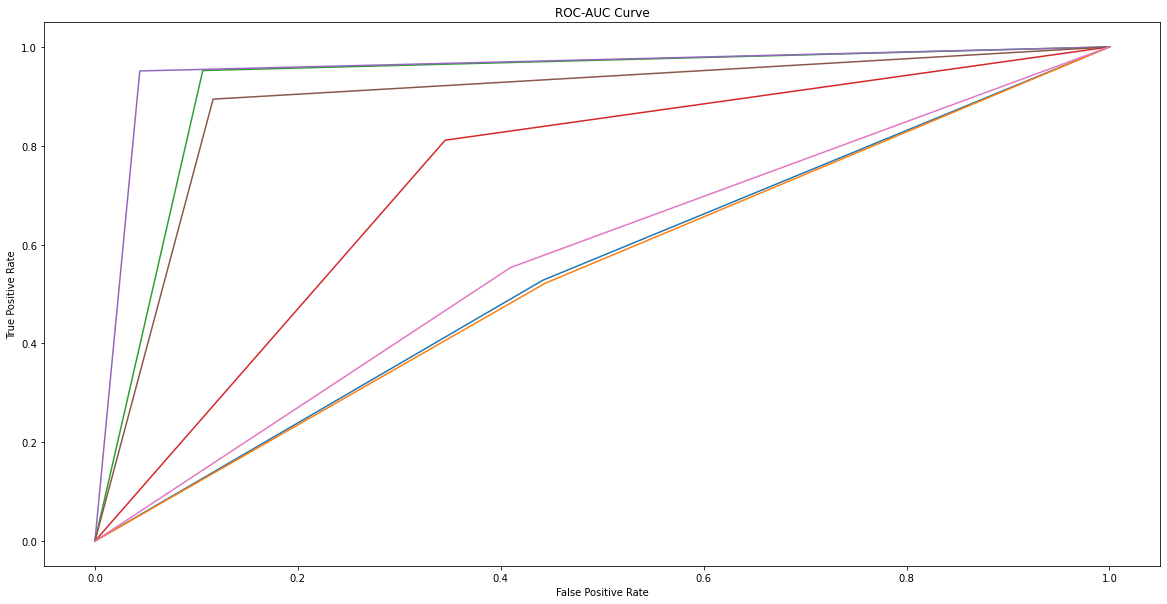

In [792]:
model_pipeline(models,gscv_pg,[x_train,y_train,x_test,y_test],metrics,best_params,roc_auc_curve_params)

In [801]:
# save best model

pickle.dump(models['rf'], open('prod_model.pkl', 'wb'))

In [804]:
# test sample
pickled_model = pickle.load(open('prod_model.pkl', 'rb'))

ex=[[590,15,2,19293,22760.0,1,1]]
ex=ss.transform(ex)
y_ex=pickled_model.predict(ex)
print(y_ex)

[0]
